In [7]:
from wipy.wipy_utils import utils
import numpy as np
from matplotlib import pyplot as plt
import obspy

n_events = 10
n_iters = 15


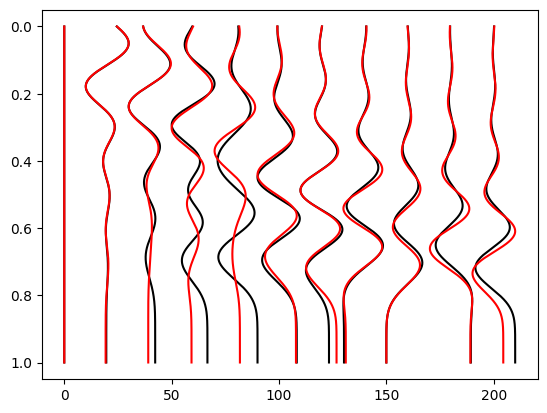

In [8]:
gather_names = "Up_file_single_x.su_proc"

path1 = "scratch/traces/obs/000000/" + gather_names
path2 = "scratch/traces/syn/000000/" + gather_names

obs = obspy.read(path1, format="SU")
syn = obspy.read(path2, format="SU")

utils.plot_traces(obs, gain=10)
utils.plot_traces(syn, gain=10, line_spec="r-")
plt.gca().invert_yaxis()

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

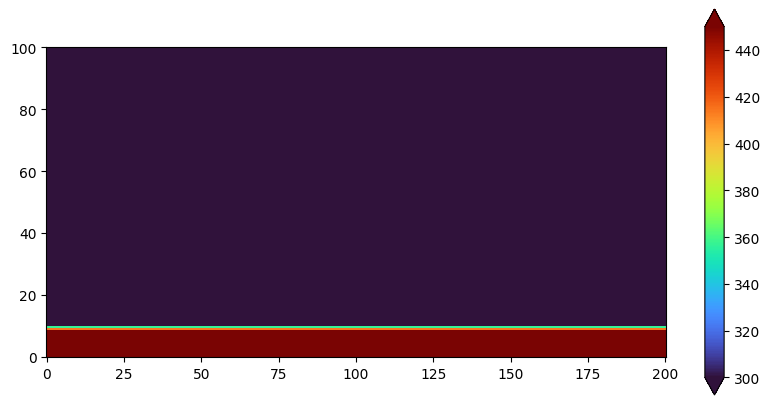

In [9]:
model_init_path = "model_init"
pars = ["x", "z", "rho", "vp", "vs"]

model_init = utils.load_model(model_init_path, pars)

utils.plot_model_fast(model_init, 0.5, 'vp')

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

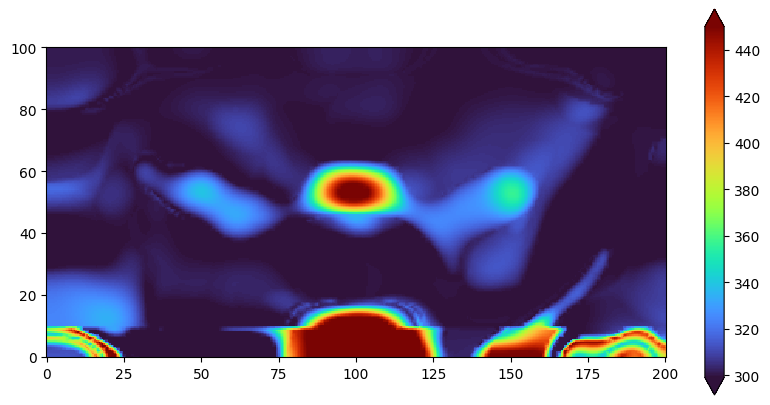

In [10]:
par = "vp"

model_final_path = "OUTPUT/model_" + "{:04d}".format(n_iters)

model_final = utils.load_model(model_path=model_final_path, pars=[par])

model_final = model_init | model_final

utils.plot_model_fast(model_final, 0.5, par)

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

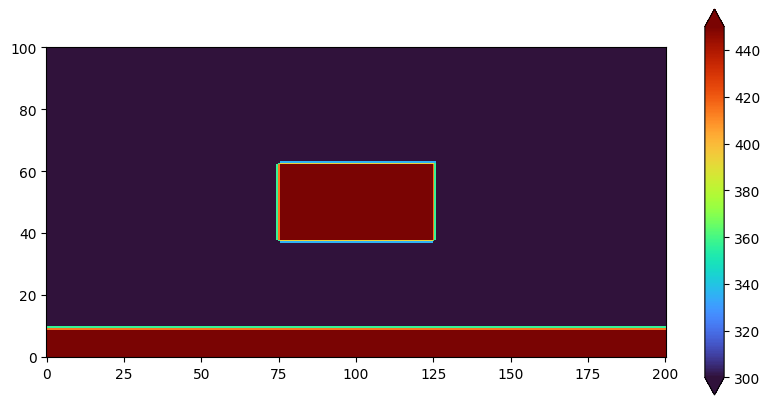

In [11]:
model_true_path = "model_true"

model_true = utils.load_model(model_path=model_true_path, pars=pars)

utils.plot_model_fast(model_true, 0.5, 'vp')

In [12]:
def sum_residuals(base_path, n_events) -> float: 
    """
    reads the residuals in and summs the residuals from multiple events together
    """
    resid_paths = ["/".join([base_path, "residuals", "{:06d}".format(num)]) for num in range(n_events)]

    misfit = 0
    for path in resid_paths:
        m = np.sum(np.loadtxt(path))
        misfit += m

    misfit /= n_events

    return misfit


In [15]:
misfit = []
for i in range(0, n_iters+1):
    resid_path = "OUTPUT/residuals_{:04d}/".format(i)
    misfit.append(sum_residuals(resid_path, n_events))

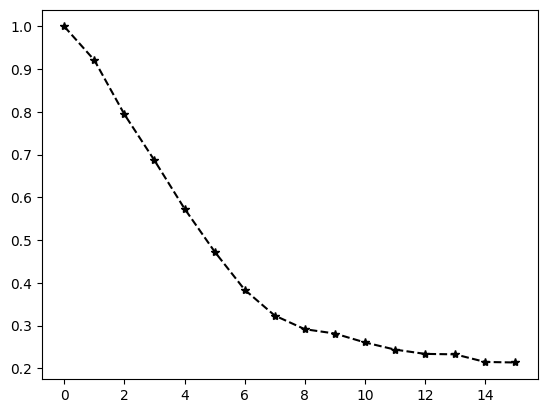

In [16]:
plt.plot(misfit/misfit[0], "k*--")